In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Veri Yükleme

In [152]:
file_path = r"C:\Users\sayit\OneDrive\Masaüstü\Bootcamp Fest'4 - Data Science 101 Bootcamp Bitirme Projesi\final_data.csv"  
data = pd.read_csv(file_path)

# Sayısal Değişkenlerin Dağılımı (Histogram ve Kutu Grafikleri)

In [153]:
numeric_columns = ['Age', 'Credit amount', 'Duration']

# Histogram

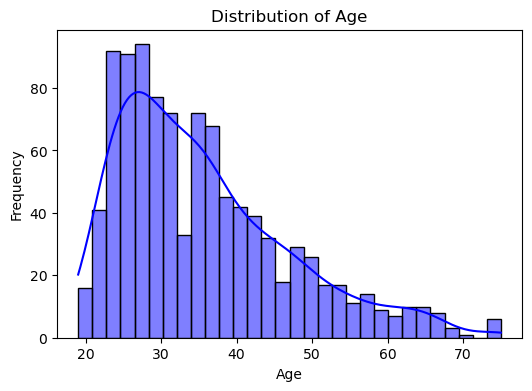

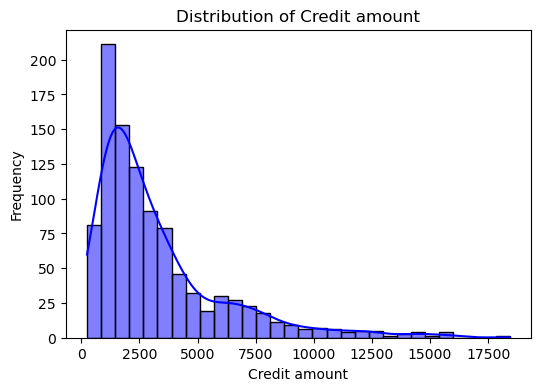

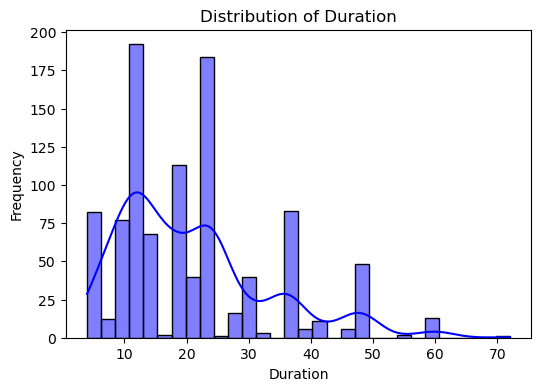

In [154]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Kutu Grafikleri

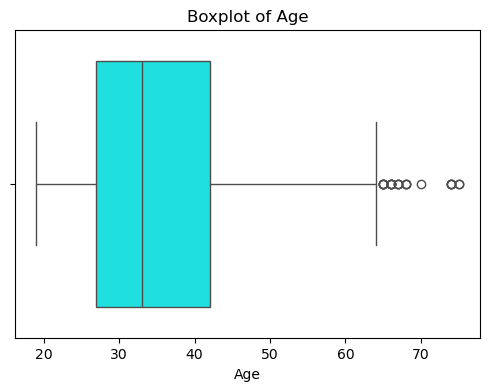

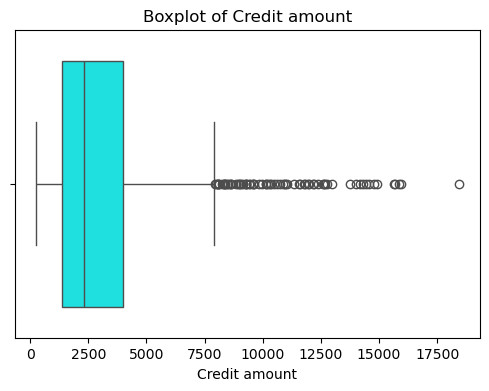

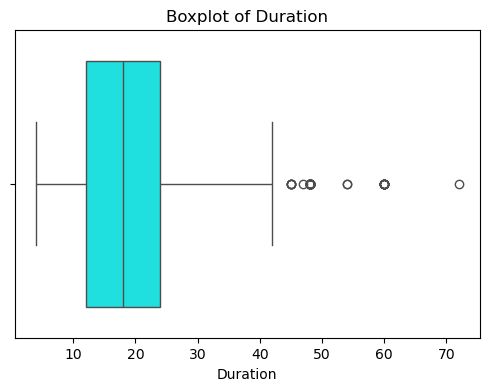

In [155]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col], color='cyan')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Kategorik Değişkenlerin Sayımları (Countplot)

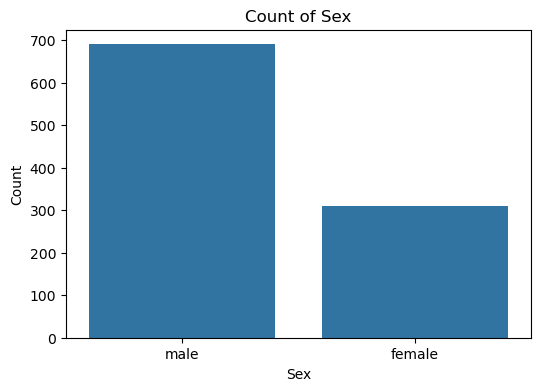

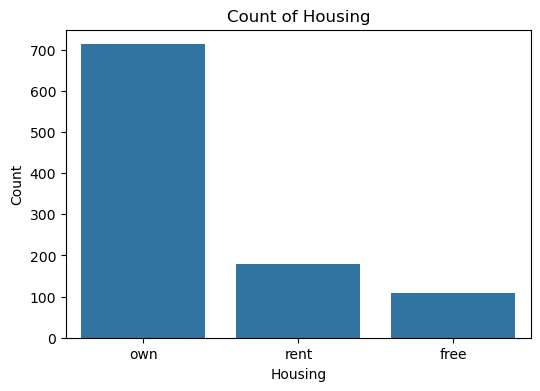

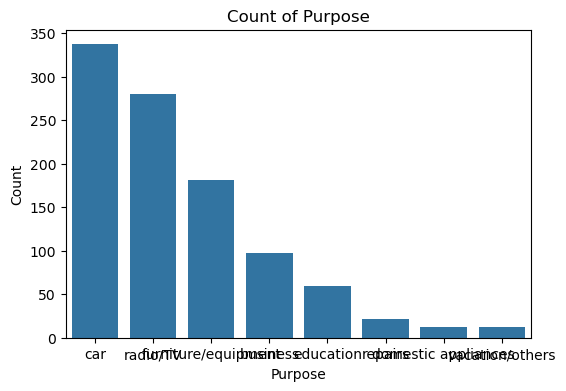

In [156]:
categorical_columns = ['Sex', 'Housing', 'Purpose']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Sayısal Özellikler Arasındaki İlişkiler - Korelasyon Haritası

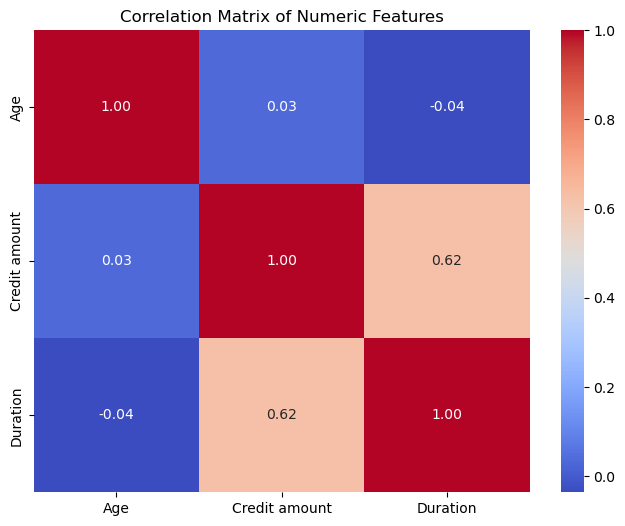

In [157]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Cevaplanması gereken sorular

In [158]:
# 1. Eksik Değer Analizi
missing_values = data.isnull().sum()
print("Eksik Değerler:\n", missing_values)

Eksik Değerler:
 Unnamed: 0.1          0
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


## Veri Setinde Eksik Değerler:

Saving accounts: 183 eksik değer.

Checking account: 394 eksik değer.

Diğer sütunlarda eksik değer yok.

Eksik değerleri doldurma veya kaldırma yöntemi sonraki adımlarda ele alınabilir.


In [159]:
# 2. Sayısal Değişkenlerin Dağılımı ve Aykırı Değerler
distribution_stats = data[numeric_columns].describe()
print("Sayısal Değişkenlerin Dağılımı:\n", distribution_stats)
outliers = {col: ((data[col] < (distribution_stats[col]['25%'] - 1.5 * (distribution_stats[col]['75%'] - distribution_stats[col]['25%']))) |
                  (data[col] > (distribution_stats[col]['75%'] + 1.5 * (distribution_stats[col]['75%'] - distribution_stats[col]['25%'])))).sum()
            for col in numeric_columns}
print("Aykırı Değer Sayıları:\n", outliers)

Sayısal Değişkenlerin Dağılımı:
                Age  Credit amount     Duration
count  1000.000000    1000.000000  1000.000000
mean     35.546000    3271.258000    20.903000
std      11.375469    2822.736876    12.058814
min      19.000000     250.000000     4.000000
25%      27.000000    1365.500000    12.000000
50%      33.000000    2319.500000    18.000000
75%      42.000000    3972.250000    24.000000
max      75.000000   18424.000000    72.000000
Aykırı Değer Sayıları:
 {'Age': 23, 'Credit amount': 72, 'Duration': 70}


## "Age", "Credit amount" ve "Duration" Dağılımları ve Aykırı Değerler:

## Dağılım bilgileri:

Age: Ortalama 35.5, minimum 19, maksimum 75.

Credit amount: Ortalama 3271, minimum 250, maksimum 18,424.

Duration: Ortalama 20.9, minimum 4, maksimum 72.

## Aykırı değer sayıları:

Age: 23 aykırı değer.

Credit amount: 72 aykırı değer.

Duration: 70 aykırı değer.



In [160]:
# 3. Hedef Kolon Oranları
risk_counts = data['Risk'].value_counts(normalize=True)
print("Hedef Kolon Oranları:\n", risk_counts)

Hedef Kolon Oranları:
 Risk
1    0.7
0    0.3
Name: proportion, dtype: float64


## Hedef Kolon Oranları ("Risk"):

"İyi" kredi riski (0): %30

"Kötü" kredi riski (1): %70

Veri dengesiz görünüyor, bu durum modelleme sırasında ele alınmalı.


In [161]:
# 4. İyi Kredi Riski Olanların Ortalama Kredi Miktarı
mean_credit_good_risk = data[data['Risk'] == 0]['Credit amount'].mean()
print("İyi Kredi Riski Olanların Ortalama Kredi Miktarı:", mean_credit_good_risk)

İyi Kredi Riski Olanların Ortalama Kredi Miktarı: 3938.1266666666666


## "İyi" Kredi Riski Olanların Ortalama Kredi Miktarı:

Ortalama kredi miktarı: 3938.13

In [162]:
# 5. "Free" Konut Kategorisindeki "Saving accounts" Dağılımı
free_housing_saving_accounts = data[data['Housing'] == 'free']['Saving accounts'].value_counts()
print("Free Konut Kategorisindeki Saving accounts Dağılımı:\n", free_housing_saving_accounts)

Free Konut Kategorisindeki Saving accounts Dağılımı:
 Saving accounts
little        67
moderate      10
quite rich     6
rich           2
Name: count, dtype: int64


## "Free" Konut Kategorisindeki "Saving accounts" Dağılımı:

little: 67

moderate: 10

quite rich: 6

rich: 2


In [163]:
# 6. İyi ve Kötü Kredi Riski Gruplarında "Duration" Farklılıkları
mean_duration_by_risk = data.groupby('Risk')['Duration'].mean()
print("İyi ve Kötü Kredi Riski Gruplarında Duration Ortalamaları:\n", mean_duration_by_risk)

İyi ve Kötü Kredi Riski Gruplarında Duration Ortalamaları:
 Risk
0    24.860000
1    19.207143
Name: Duration, dtype: float64


## "İyi" ve "Kötü" Kredi Riski Grupları Arasında "Duration" Farklılıkları:

"İyi" kredi riski: Ortalama süre 24.86

"Kötü" kredi riski: Ortalama süre 19.21

Farklılık gözleniyor.


In [164]:
# 7. Yüksek Kredi Miktarına Sahip Kşiilerin En Sık 3 "Purpose" Kategorisi
high_credit_threshold = data['Credit amount'].quantile(0.75)
top_purposes_high_credit = data[data['Credit amount'] > high_credit_threshold]['Purpose'].value_counts().head(3)
print("Yüksek Kredi Miktarında En Sık 3 Purpose Kategorisi:\n", top_purposes_high_credit)

Yüksek Kredi Miktarında En Sık 3 Purpose Kategorisi:
 Purpose
car         108
radio/TV     39
business     39
Name: count, dtype: int64


## Yüksek Kredi Miktarına Sahip Bireylerin En Sık 3 "Purpose" Kategorisi:

car: 108 kişi.

radio/TV: 39 kişi.

business: 39 kişi.


# Veri Temizleme ve Ön İşleme
## 1. Eksik Değerlerin Ele Alınması (Kategorik Değişkenler)

"Saving accounts" ve "Checking account" eksik değerlerin doldurulması ve sayısal dönüşüm


In [165]:
categorical_mapping = {"unknown": 0, "little": 1, "moderate": 2, "rich": 3, "quite rich": 4}
for col in ['Saving accounts', 'Checking account']:
    data[col] = data[col].fillna("unknown")  # Eksik değerleri "unknown" ile doldurma
    data[col] = data[col].map(categorical_mapping)  # Sayısal dönüşüm


## 2. Eksik Değerlerin Ele Alınması (Sayısal Değişkenler)

In [166]:
for col in numeric_columns:
    median_value = data[col].median()  # Medyan değeri hesapla
    data[col] = data[col].fillna(median_value)  # Eksik değerleri doldur

print("Eksik Değerler Temizlendikten Sonra:\n", data.isnull().sum())

Eksik Değerler Temizlendikten Sonra:
 Unnamed: 0.1        0
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


## 3. Kategorik Değişkenlerin Kodlanması (One-Hot Encoding)

"Purpose" ve "Housing" için one-hot encoding

In [167]:
if 'Purpose_new' not in data.columns:
    data = pd.get_dummies(data, columns=['Purpose'], drop_first=True)

if 'Housing_new' not in data.columns:
    data = pd.get_dummies(data, columns=['Housing'], drop_first=True)

# "Sex" sütununu binary encoding ile dönüştürme
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

print("One-Hot Encoding Tamamlandı. Yeni Kolonlar:\n", data.columns)

One-Hot Encoding Tamamlandı. Yeni Kolonlar:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Age', 'Sex', 'Job', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Risk', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Housing_own', 'Housing_rent'],
      dtype='object')


## 4. Özellik Ölçekleme
"Age", "Credit amount" ve "Duration" için standartlaştırma

In [168]:
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("Özellik Ölçekleme Tamamlandı. İlk Satırlar:\n", data[numeric_columns].head())

Özellik Ölçekleme Tamamlandı. İlk Satırlar:
         Age  Credit amount  Duration
0  2.766456      -0.745131 -1.236478
1 -1.191404       0.949817  2.248194
2  1.183312      -0.416562 -0.738668
3  0.831502       1.634247  1.750384
4  1.535122       0.566664  0.256953


# Özellik Mühendisliği

## 1. Aylık Kredi Miktarı (Credit per Month)

In [169]:
data['Credit per Month'] = data['Credit amount'] / (data['Duration'] + 1e-9)  # Bölme işleminde sıfıra bölmeyi önlemek için küçük bir sabit eklenmiştir
print("Aylık Kredi Miktarı Özelliği Eklendi. İlk Satırlar:\n", data['Credit per Month'].head())

Aylık Kredi Miktarı Özelliği Eklendi. İlk Satırlar:
 0    0.602624
1    0.422480
2    0.563938
3    0.933651
4    2.205319
Name: Credit per Month, dtype: float64


## 2. Yaş Kategorileri

In [170]:
original_age = data['Age'] * scaler.scale_[0] + scaler.mean_[0] 
bins = [0, 25, 50, 75]
labels = ['Genç', 'Orta Yaş', 'Yaşlı']
data['Age Category'] = pd.cut(original_age, bins=bins, labels=labels, right=False)
print("Yaş Kategorileri Eklendi. İlk Satırlar:\n", data[['Age', 'Age Category']].head())

Yaş Kategorileri Eklendi. İlk Satırlar:
         Age Age Category
0  2.766456        Yaşlı
1 -1.191404         Genç
2  1.183312     Orta Yaş
3  0.831502     Orta Yaş
4  1.535122        Yaşlı


## 3. Yüksek Korelasyona Sahip Özelliklerin Kaldırılması

In [171]:
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
high_correlation_features = [
    col for col in correlation_matrix.columns 
    if any((correlation_matrix[col] > 0.9) & (correlation_matrix[col] < 1.0))
]
data.drop(columns=high_correlation_features, inplace=True)
print("Yüksek Korelasyona Sahip Özellikler Kaldırıldı. Yeni Kolonlar:\n", data.columns)

Yüksek Korelasyona Sahip Özellikler Kaldırıldı. Yeni Kolonlar:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Age', 'Sex', 'Job', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Risk', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Housing_own', 'Housing_rent',
       'Credit per Month', 'Age Category'],
      dtype='object')


# Model Uygulaması

## 1. Lojistik Regresyon Modeli

In [172]:
# Bağımsız ve bağımlı değişkenlerin ayrılması
X = data.drop(columns=['Risk', 'Age Category'])
y = data['Risk']

In [173]:
# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Lojistik Regresyon Modeli Eğitimi
logistic_model = LogisticRegression(max_iter=2000, solver='lbfgs')
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [175]:
# Lojistik Regresyon Model Performansı
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Lojistik Regresyon Model Performansı:")
print(f"Doğruluk (Accuracy): {accuracy:.2f}")
print(f"Kesinlik (Precision): {precision:.2f}")
print(f"Duyarlılık (Recall): {recall:.2f}")
print(f"F1-Skoru: {f1:.2f}")
print("Detaylı Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Lojistik Regresyon Model Performansı:
Doğruluk (Accuracy): 0.70
Kesinlik (Precision): 0.74
Duyarlılık (Recall): 0.91
F1-Skoru: 0.81
Detaylı Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.50      0.22      0.31        59
           1       0.74      0.91      0.81       141

    accuracy                           0.70       200
   macro avg       0.62      0.56      0.56       200
weighted avg       0.67      0.70      0.66       200



# 2. KNN Sınıflandırma

In [176]:
# En iyi k değerini bulmak için çapraz doğrulama
k_values = range(1, 21)  # 1 ile 20 arasında k değerlerini test edeceğiz
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5 katlı çapraz doğrulama
    k_scores.append(scores.mean())


In [177]:
# En iyi k değerini belirleme
best_k = k_values[np.argmax(k_scores)]
print(f"En iyi k değeri: {best_k}")

En iyi k değeri: 19


In [178]:
# En iyi k değeri ile KNN modeli eğitimi
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [179]:
# KNN Model Performansı
y_pred_knn = knn_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nKNN Model Performansı:")
print(f"Doğruluk (Accuracy): {accuracy_knn:.2f}")
print(f"Kesinlik (Precision): {precision_knn:.2f}")
print(f"Duyarlılık (Recall): {recall_knn:.2f}")
print(f"F1-Skoru: {f1_knn:.2f}")
print("Detaylı Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_knn))


KNN Model Performansı:
Doğruluk (Accuracy): 0.69
Kesinlik (Precision): 0.71
Duyarlılık (Recall): 0.95
F1-Skoru: 0.81
Detaylı Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.36      0.07      0.11        59
           1       0.71      0.95      0.81       141

    accuracy                           0.69       200
   macro avg       0.54      0.51      0.46       200
weighted avg       0.61      0.69      0.61       200



# Model Değerlendirmesi

Lojistik Regresyon Modeli Değerlendirmesi:



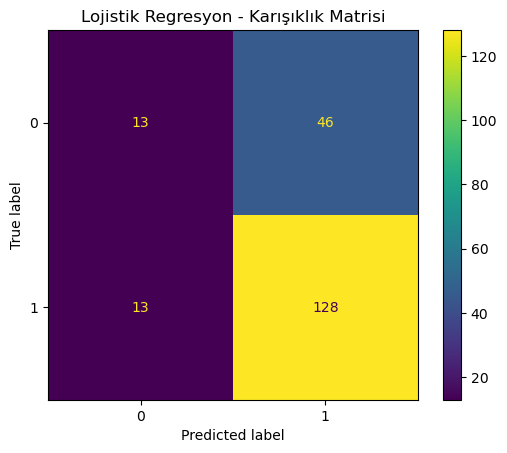

Lojistik Regresyon - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.50      0.22      0.31        59
           1       0.74      0.91      0.81       141

    accuracy                           0.70       200
   macro avg       0.62      0.56      0.56       200
weighted avg       0.67      0.70      0.66       200



In [180]:
# Lojistik Regresyon Modeli Değerlendirmesi
print("Lojistik Regresyon Modeli Değerlendirmesi:\n")
# Karışıklık Matrisi
conf_matrix_lr = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=logistic_model.classes_).plot()
plt.title("Lojistik Regresyon - Karışıklık Matrisi")
plt.show()

# Sınıflandırma Raporu
print("Lojistik Regresyon - Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


KNN Modeli Değerlendirmesi:



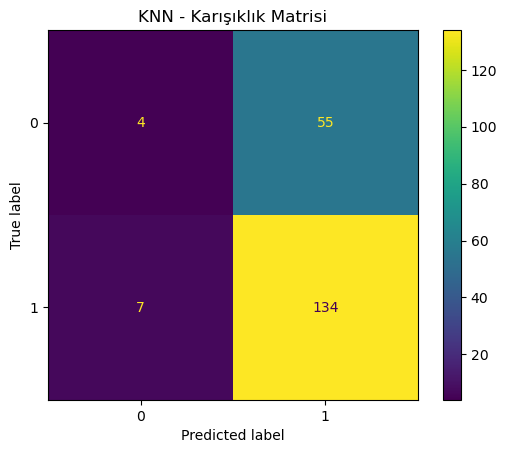

KNN - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.36      0.07      0.11        59
           1       0.71      0.95      0.81       141

    accuracy                           0.69       200
   macro avg       0.54      0.51      0.46       200
weighted avg       0.61      0.69      0.61       200



In [181]:
# KNN Modeli Değerlendirmesi
print("\nKNN Modeli Değerlendirmesi:\n")
# Karışıklık Matrisi
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=knn_best.classes_).plot()
plt.title("KNN - Karışıklık Matrisi")
plt.show()

# Sınıflandırma Raporu
print("KNN - Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_knn))

## Lojistik Regresyon ve KNN sonuçlarını karşılaştırın. Hangi model daha iyi performans gösteriyor? Neden?

## 1. Metriklerin Karşılaştırması:

## 2. Karışıklık Matrisi Analizi:

## 3. Genel Değerlendirme:

## 4. Nedenler:

## Sonuç: